In [249]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import BayesianRidge, LinearRegression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.neural_network import MLPRegressor
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Activation
from keras.utils import to_categorical
from keras import layers
import keras
import itertools
from sklearn.utils import resample
from keras.utils import np_utils

def correlation_matrix(df):
    corr=df.corr()
    sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)
    plt.show()
    plt.clf()
    plt.cla()
    plt.close()
    
def plot_box_plot(dataframe_slice, column_name='age', exceptions=[]):
    #gives individual boxplot with all step names
    list_ = dataframe_slice.columns.tolist()
    for column in list_:
        if column in exceptions:
            continue
        else:
            bp = dataframe_slice.boxplot(column=column)
            plt.show(bp)
            plt.clf()
            plt.cla()
            plt.close()
            
def plot_histogram_balancing(dataframe,class_name):
    print(dataframe[class_name].value_counts().to_dict())
    plt.show(dataframe.hist(column=class_name, color='red'))
    plt.clf()
    plt.cla()
    plt.close()
    
def balance_classes_down_sampling(df, class_name, majority_value, minority_value):
    # Separate majority and minority classes
    df_majority = df[df[class_name]==majority_value]
    df_minority = df[df[class_name]==minority_value]
    df = df[df[class_name]!=majority_value]
    df = df[df[class_name]!=minority_value]
    
    # Downsample majority class
    df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=len(df_minority),     # to match minority class
                                 random_state=123) # reproducible results
 
    # Combine minority class with downsampled majority class
    df_downsampled = pd.concat([df_majority_downsampled, df_minority])
    df = pd.concat([df, df_downsampled])

    # Display new class counts
    return df

def balance_classes_up_sampling(df, class_name, majority_value, minority_value):
    # Separate majority and minority classes
    df_majority = df[df[class_name]==majority_value]
    df_minority = df[df[class_name]==minority_value]
    df = df[df[class_name]!=majority_value]
    df = df[df[class_name]!=minority_value]
    # Upsample minority class
    df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=len(df_majority),    # to match majority class
                                 random_state=123) # reproducible results
 
    # Combine majority class with upsampled minority class
    df_upsampled = pd.concat([df_majority, df_minority_upsampled])
    df = pd.concat([df, df_upsampled])
    # Display new class counts
    return df

def plot_confusion_matrix(conf_matrix, classes=None,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
    plt.imshow(conf_matrix, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    if classes:
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45)
        plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = conf_matrix.max() / 2.
    for i, j in itertools.product(range(conf_matrix.shape[0]), range(conf_matrix.shape[1])):
        plt.text(j, i, format(conf_matrix[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()
    plt.clf()
    plt.cla()
    plt.close()
    
def compute_confusion_matrix(cnf_matrix, classes_):
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    plt.figure()
    if classes_:
        plot_confusion_matrix(cnf_matrix, classes=classes_,
                      title='Confusion matrix, without normalization')
    else:
        plot_confusion_matrix(cnf_matrix,
                      title='Confusion matrix, without normalization')
        
    # Plot normalized confusion matrix
    plt.figure()
    if classes_:
        plot_confusion_matrix(cnf_matrix, classes=classes_, normalize=True,
                      title='Normalized confusion matrix')
    else:
        plot_confusion_matrix(cnf_matrix, normalize=True,
                      title='Normalized confusion matrix')
        
           
def RegBay(Modelo, x_train, y_train, x_test, y_test): 
    model = MultiOutputRegressor(Modelo())
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test) 
    plt.plot(y_test, y_pred, '.')
    xg = np.linspace(0, 10, 1, endpoint=False)
    yg = xg
    plt.plot(xg, yg)
    plt.show()
    print(model.score(x_test, y_test))
    print(mean_absolute_error(y_test, y_pred,multioutput='uniform_average'), " Mean Absolute Error")

def RegRS(Modelo, x_train, y_train, x_test, y_test): 
    model = MultiOutputRegressor(Modelo(random_state=100))
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test) 
    plt.plot(y_test, y_pred, '.')
    xg = np.linspace(0, 10, 1, endpoint=False)
    yg = xg
    plt.plot(xg, yg)
    plt.show()
    print(model.score(x_test, y_test))
    print(mean_absolute_error(y_test, y_pred,multioutput='uniform_average'), " Mean Absolute Error")
    
def Class(modelo, x_train, y_train, x_test, y_test, classes_=None):
    knn = modelo()
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))
    print("F1 Score: ", f1_score(y_test, y_pred, average='weighted')) 
    compute_confusion_matrix(confusion_matrix(y_test, y_pred), classes_)
#     print("Confusion Matrix: ", )
    

def CutDataset(dataset, entrada, saida, fora): 
    y = dataset.drop(labels=[entrada[0]], axis=1)
    x = dataset.drop(labels=[saida[0]], axis=1)
    
    for i in entrada[1:]:
        y = y.drop(labels=[i], axis=1)

    for i in saida[1:]:
        x = x.drop(labels=[i], axis=1)  
        
    for i in fora:
        x = x.drop(labels=[i], axis=1)  
        y = y.drop(labels=[i], axis=1)

    return x, y        
    
def NewColumn(corners, data, colunaHome, colunaAway, colunaTipo):                 
    for i in range(0, 20):
        corners[i][colunaTipo] = (corners[i][colunaTipo]/(len(data)/10))
    data[colunaHome] = 0
    data[colunaAway] = 0
    for i in range(0, 20):
        indexH = data.index[data['HomeTeam'] == corners[i][0]].tolist()
        data = data.set_value(indexH, colunaHome, corners[i][colunaTipo], takeable=False)
        indexA = data.index[data['AwayTeam'] == corners[i][0]].tolist()
        data = data.set_value(indexA, colunaAway, corners[i][colunaTipo], takeable=False)
        
def Fduplicated(x_train, y_train):
    
    season9 = x_train.loc[dataset['Season'] == 9]
    season8 = x_train.loc[dataset['Season'] == 8]
    season7 = x_train.loc[dataset['Season'] == 7]
    
    yseason9 = y_train.loc[dataset['Season'] == 9]
    yseason8 = y_train.loc[dataset['Season'] == 8]
    yseason7 = y_train.loc[dataset['Season'] == 7]
        
    for i in range(1,5):
        season9=season9.append(season9) 
    
    for i in range(1,2):
        season8=season8.append(season8) 
    
    season7=season7.append(season7) 
    
    for i in range(1,5):
        yseason9=yseason9.append(yseason9) 
    
    for i in range(1,2):
        yseason8=yseason8.append(yseason8) 
        
    yseason7=yseason7.append(yseason7) 
        
    x_train = x_train.append(season7)
    x_train = x_train.append(season8)
    x_train = x_train.append(season9)
    y_train = y_train.append(yseason7)
    y_train = y_train.append(yseason8)
    y_train = y_train.append(yseason9)
    
    return x_train, y_train

def dummyEncode(df):
        columnsToEncode = list(df.select_dtypes(include=['category','object']))
        for feature in columnsToEncode:
            try:
                print('Feature being encoded %s...' % feature)
#                dummies = pd.get_dummies(df[feature], prefix=feature, drop_first=False)
                df[feature] = pd.Categorical(dataset[feature]).codes
#                df = pd.concat([df, dummies], axis=1)
            except:
                print('Error encoding '+feature)
        return df
    
def select_sets(df, input_set, output_set):
# =============================================================================
#     for ignore in ignored_set:
#         filter_col = [col for col in df if col.startswith(ignore)]
#         df = df.drop(labels=filter_col, axis=1)
# =============================================================================
        
#    input_list = []    
#    for input_ in input_set:
#        filter_col = [col for col in df.keys() if col.startswith(input_)]
#        for filter_ in filter_col:
#            input_list.append(filter_)
    X = df[input_set]            
    
    Y = df[output_set]
    
    return X, Y


In [250]:
data_0910 = pd.read_csv('09-10.csv')
data_1011 = pd.read_csv('10-11.csv')
data_1112 = pd.read_csv('11-12.csv')
data_1213 = pd.read_csv('12-13.csv')
data_1314 = pd.read_csv('13-14.csv')
data_1415 = pd.read_csv('14-15.csv')
data_1516 = pd.read_csv('15-16.csv')
data_1617 = pd.read_csv('16-17.csv')
data_1718 = pd.read_csv('17-18.csv')
data_1819 = pd.read_csv('18-19.csv')

In [251]:
#Atribuindo coluna Season
data_0910['Season'] = 0
data_1011['Season'] = 1
data_1112['Season'] = 2
data_1213['Season'] = 3
data_1314['Season'] = 4
data_1415['Season'] = 5
data_1516['Season'] = 6
data_1617['Season'] = 7
data_1718['Season'] = 8
data_1819['Season'] = 9

In [252]:
#Corners/Yellow Cards/shots/goals/goals Conceded

corners1819 =   [['Man City', 77, 10, 198, 26, 3],
                ['Everton',59, 13, 123, 15, 12],
                ['Chelsea', 56, 7, 163, 20, 7],
                ['Man United',52, 18, 119, 15, 16],
                ['Wolves',52, 16, 120, 9, 8],
                ['Bournemouth',51, 13, 108, 16, 12],
                ['Watford',51, 19, 110, 13, 12],
                ['Newcastle',48, 10, 92, 6, 14],
                ['Crystal Palace',47, 17, 100, 5, 11],
                ['Southampton',46, 20, 124, 6, 14],
                ['Tottenham',46, 12, 126, 16, 7],
                ['Liverpool',43, 10, 126, 16, 3],
                ['Arsenal',42, 15, 116, 22, 22, 11],
                ['West Ham',42, 25, 95, 8, 14],
                ['Cardiff',40, 13, 108, 8, 19],
                ['Leicester',37, 15, 99, 15, 15],
                ['Huddersfield',36, 13, 89, 4, 18],
                ['Fulham',35, 16, 120, 11, 25],
                ['Brighton',33, 20, 74, 10, 13],
                ['Burnley',25, 18, 78, 10, 17]]

corners1718 =   [['Man City', 284, 59, 665, 106, 27],
                ['Tottenham', 246, 50, 623, 74, 36],
                ['Chelsea',	230, 42, 606, 62, 38],
                ['Liverpool',230, 44, 638, 84, 38],
                ['Southampton',	227, 63, 450, 37, 56],
                ['Arsenal',	225, 57, 594, 74, 51],
                ['Man United', 220, 64, 512, 68, 28],
                ['Bournemouth',	218, 55, 465, 45, 61],
                ['Crystal Palace', 210, 72, 476, 45, 55],
                ['Leicester', 203, 52, 423, 56, 60],
                ['Watford',	183, 63, 440, 44, 64],
                ['West Brom',176, 73, 378, 31, 56],
                ['Burnley',	167, 65, 378, 36, 39],
                ['Newcastle', 167, 52, 451, 39, 47],
                ['Huddersfield', 165, 62, 362, 28, 58],
                ['Brighton'	,163, 54, 384, 34, 54],
                ['West Ham', 161, 73, 372, 48, 68],
                ['Everton', 150, 51, 359, 44, 58],
                ['Swansea', 150, 51, 338, 28, 56],
                ['Stoke', 136, 62, 384, 35, 68]]

corners1617 =  	[['Man City', 280, 71, 633, 80, 39],
                ['Tottenham', 273, 62, 669, 86, 26],
                ['Liverpool', 249, 54, 640, 78, 42],
                ['Arsenal', 227, 68, 566, 77, 44],
                ['Chelsea', 218, 72, 580, 85, 33],
                ['Man United', 217, 78, 591, 54, 29],
                ['Crystal Palace', 203, 77, 439, 50, 63],
                ['Southampton', 198, 59, 550, 41, 48],
                ['Leicester', 197, 72, 433, 48, 63],
                ['Everton', 196, 72, 502, 62, 44],
                ['Swansea', 196, 56, 405, 45, 70],
                ['Bournemouth', 193, 52, 452, 55, 67],
                ['Stoke', 188, 70, 425, 41, 56],
                ['Hull', 179, 67, 397, 37, 80],
                ['West Ham', 172, 78, 499, 47, 64],
                ['Watford', 164, 84, 422, 40, 68],
                ['Sunderland', 159, 78, 387, 29, 69],
                ['West Brom', 159, 80, 399, 43, 51],
                ['Burnley', 149, 65, 391, 39, 55],
                ['Middlesbrough', 141, 77, 351, 27, 53]]

corners1516 =   [['Liverpool', 265, 61, 629, 63, 50],
                ['Man City', 257, 61, 615, 71, 41],
                ['Tottenham', 254, 72, 659, 69, 35],
                ['Chelsea', 240, 58, 526, 59, 53],
                ['Man United', 228, 65, 430, 49, 35],
                ['Arsenal', 227, 40, 571, 65, 36],
                ['West Ham', 224, 58, 558, 65, 51],
                ['Bournemouth', 221, 53, 464, 45, 67],
                ['Southampton', 220, 57, 519, 59, 41],
                ['Crystal Palace', 219, 60, 469, 39, 51],
                ['Everton', 218, 44, 491, 59, 55],
                ['Leicester', 197, 48, 522, 68, 36],
                ['Norwich', 188, 61, 418, 39, 67],
                ['West Brom', 188, 65, 388, 34, 48],
                ['Aston Villa', 167, 75, 380, 27, 76],
                ['Watford', 164, 73, 446, 40, 50],
                ['Swansea', 163, 60, 441, 42, 52],
                ['Newcastle', 161, 60, 397, 44, 65],
                ['Stoke', 153, 51, 419, 41, 55],
                ['Sunderland',153, 64, 439, 48, 62]]

corners1415 =   [['Man City', 277, 77, 670, 83, 38],
				['Arsenal', 254, 68, 610, 71, 36],
				['West Ham', 241, 64, 488, 44, 47],
				['Chelsea', 226, 73, 564, 73, 32],
				['Tottenham', 224, 79, 527, 58, 53],
				['Newcastle', 222, 65, 468, 40, 63],
				['Man United', 214, 64, 512, 62, 37],
				['Leicester', 211, 49, 456, 46, 55],
				['Crystal Palace', 209, 63, 441, 47, 51],
				['Southampton', 208, 57, 509, 54, 33],
				['Liverpool', 198, 66, 590, 52, 48],
				['Stoke', 195, 82, 500, 48, 45],
				['Everton', 194, 66, 483, 48, 50],
				['Sunderland', 186, 94, 408, 31, 53],
				['QPR',	179, 75, 534, 42, 73],
				['Aston Villa', 171, 70, 418, 31, 57],
				['Burnley', 171, 64, 430, 28, 53],
				['West Brom', 171, 64, 412, 38, 51],
				['Hull', 169, 73, 428, 33, 51],
				['Swansea', 151, 48, 426, 46, 49]]

corners1314 =	[['Man City', 283, 72, 673, 102, 37],
				['Everton', 251, 55, 561, 61, 39],
				['Chelsea', 248, 57, 692, 71, 27],
				['Tottenham', 230, 66, 588, 55, 51],
				['Swansea', 226, 55, 496, 54, 54],
				['Liverpool', 224, 54, 651, 101, 50],
				['Man United', 216, 66, 526, 64, 43],
				['Arsenal', 210, 53, 523, 68, 41],
				['Southampton', 210, 60, 534, 54, 46],
				['Norwich', 197, 62,467, 28, 62],
				['Cardiff', 196, 49, 418, 32, 74],
				['Fulham', 194, 58, 431, 40, 85],
				['Newcastle', 190, 53, 579, 43, 59],
				['Sunderland', 188, 59, 491, 41, 60],
				['West Brom', 187, 67, 487, 43, 59],
				['West Ham', 185, 62, 422, 40, 51],
				['Crystal Palace', 172, 58, 414, 33, 48],
				['Stoke', 164, 72, 428, 45, 52],
				['Aston Villa', 163, 78, 431, 39, 61],
				['Hull', 160, 53, 427, 38, 53]]


corners1213	=	[['Liverpool', 284, 54, 739, 71, 43],
				['Man City', 269, 62, 660, 66, 34],
				['Tottenham', 262, 55, 681, 66, 46],
				['Arsenal', 260, 42, 597, 72, 37],
				['Everton', 257, 59, 633, 55, 40],
				['Chelsea', 240, 51, 636, 75, 39],
				['Man United', 218, 57, 561, 86, 43],
				['West Ham', 212, 74, 492, 45, 53],
				['Southampton', 209, 43, 516, 49, 60],
				['Newcastle', 203, 71, 533, 45, 68],
				['West Brom', 202, 63, 506, 53, 57],
				['Wigan', 198, 66, 500, 47, 73],
				['Swansea', 193, 58, 504, 47, 51],
				['Reading', 189, 45, 394, 43, 73],
				['Sunderland', 179, 62, 417, 41, 54],
				['Aston Villa', 177, 72, 438, 47, 69],
				['Fulham', 176, 48, 460, 50, 60],
				['Norwich', 172, 60, 431, 41, 58],
				['QPR', 170, 59, 500, 30, 60],
				['Stoke', 165, 78, 390, 34, 45]]


corners1112 =	[['Liverpool', 309, 53, 667, 47, 40],
				['Man United', 279, 51, 646, 89, 33],
				['Tottenham', 279, 43, 701, 66, 41],
				['Man City', 269, 51, 738, 93, 29],
				['Arsenal', 262, 64, 637, 74, 49],
				['Chelsea', 253, 74, 671, 65, 46],
				['Aston Villa', 218, 70, 438, 37, 53],
				['West Brom', 212, 48, 544, 45, 52],
				['Wigan', 212, 67, 519, 42, 62],
				['Bolton', 210, 50, 495, 46, 77],
				['Wolves', 205, 64, 473, 40, 82],
				['Swansea', 201, 40, 472, 44, 51],
				['QPR', 195, 54, 539, 43, 66],
				['Fulham', 187,  54, 541, 48, 51],
				['Sunderland', 181, 60, 458, 45, 46],
				['Everton', 180, 60, 520, 50, 40],
				['Newcastle', 171, 67, 489, 56, 51],
				['Blackburn', 166, 66, 453, 48, 78],
				['Stoke', 166, 60, 376, 36, 53],
				['Norwich', 165, 58, 514, 52, 66]]

corners1011 =	[['Chelsea', 257, 59, 745, 69, 33],
				['Tottenham', 256, 51, 657, 55, 46], 
				['Arsenal', 252, 65, 654, 72, 43],
				['Everton', 245, 55, 580, 51, 45],
				['Man United', 243, 56, 618, 78, 37],
				['Wolves', 241, 62, 459, 46, 66],
				['Aston Villa', 230, 71, 506, 48, 59],
				['Man City', 222, 71, 546, 60, 33],
				['Liverpool', 212, 63, 582, 59, 44],
				['Newcastle', 202, 78, 507, 56, 57],
				['Bolton', 197, 67, 570, 52, 56],
				['Fulham', 191, 52, 547, 49, 43],
				['Stoke', 191, 68, 482, 46, 48],
				['West Brom', 187, 52, 597, 56, 71],
				['Blackpool', 183, 47, 531, 55, 78],
				['Sunderland', 181, 57, 532, 45, 56],
				['West Ham', 181, 59, 572, 43, 70],
				['Blackburn', 173, 65, 453, 46, 59],
				['Wigan', 169, 67, 511, 40, 61],
				['Birmingham', 150, 57, 401, 37, 58]]

corners0910 = 	[['Man United', 297, 49, 695, 86, 28],
				['Chelsea', 286, 54, 834, 103, 32],
				['Liverpool', 268, 55, 642, 61, 35],
				['Arsenal', 257, 56, 660, 83, 41],
				['Tottenham', 241, 58, 681, 67, 41],
				['Man City', 237, 49, 526, 73, 45],
				['Aston Villa', 236, 59, 497, 52, 39],
				['Everton', 230, 57, 589, 60, 49],
				['Wolves', 204, 63, 436, 32, 56],
				['Portsmouth', 189, 68, 533, 34, 66],
				['Birmingham', 186, 74, 452, 38, 47],
				['Bolton', 183, 74, 558, 42, 67],
				['Blackburn', 181, 57, 489, 41, 55],
				['Stoke', 181, 63, 402, 34, 48],
				['Wigan', 181, 65, 555, 37, 79],
				['Sunderland', 180, 77, 444, 48, 56],
				['West Ham', 180, 62, 549, 47, 66],
				['Fulham', 177, 46, 463, 39, 46],
				['Burnley', 174, 57, 459, 42, 82],
				['Hull', 150, 64, 388, 34, 75]]

#ESCANTEIOS
NewColumn(corners1819, data_1819, 'MeanCornersHome', 'MeanCornersAway', 1)   
NewColumn(corners1718, data_1718, 'MeanCornersHome', 'MeanCornersAway', 1)   
NewColumn(corners1617, data_1617, 'MeanCornersHome', 'MeanCornersAway', 1)   
NewColumn(corners1516, data_1516, 'MeanCornersHome', 'MeanCornersAway', 1)   
NewColumn(corners1415, data_1415, 'MeanCornersHome', 'MeanCornersAway', 1)
NewColumn(corners1314, data_1314, 'MeanCornersHome', 'MeanCornersAway', 1)
NewColumn(corners1213, data_1213, 'MeanCornersHome', 'MeanCornersAway', 1)
NewColumn(corners1112, data_1112, 'MeanCornersHome', 'MeanCornersAway', 1)
NewColumn(corners1011, data_1011, 'MeanCornersHome', 'MeanCornersAway', 1)
NewColumn(corners0910, data_0910, 'MeanCornersHome', 'MeanCornersAway', 1)

#CARTOES AMARELOS
NewColumn(corners1819, data_1819, 'MeanCardsHome', 'MeanCardsAway', 2)   
NewColumn(corners1718, data_1718, 'MeanCardsHome', 'MeanCardsAway', 2)   
NewColumn(corners1617, data_1617, 'MeanCardsHome', 'MeanCardsAway', 2)    
NewColumn(corners1516, data_1516, 'MeanCardsHome', 'MeanCardsAway', 2)    
NewColumn(corners1415, data_1415, 'MeanCardsHome', 'MeanCardsAway', 2) 
NewColumn(corners1314, data_1314, 'MeanCardsHome', 'MeanCardsAway', 2) 
NewColumn(corners1213, data_1213, 'MeanCardsHome', 'MeanCardsAway', 2) 
NewColumn(corners1112, data_1112, 'MeanCardsHome', 'MeanCardsAway', 2) 
NewColumn(corners1011, data_1011, 'MeanCardsHome', 'MeanCardsAway', 2) 
NewColumn(corners0910, data_0910, 'MeanCardsHome', 'MeanCardsAway', 2) 

#CHUTES
NewColumn(corners1819, data_1819, 'MeanShotsHome', 'MeanShotsAway', 3)    
NewColumn(corners1718, data_1718, 'MeanShotsHome', 'MeanShotsAway', 3)    
NewColumn(corners1617, data_1617, 'MeanShotsHome', 'MeanShotsAway', 3)    
NewColumn(corners1516, data_1516, 'MeanShotsHome', 'MeanShotsAway', 3)    
NewColumn(corners1415, data_1415, 'MeanShotsHome', 'MeanShotsAway', 3) 
NewColumn(corners1314, data_1314, 'MeanShotsHome', 'MeanShotsAway', 3) 
NewColumn(corners1213, data_1213, 'MeanShotsHome', 'MeanShotsAway', 3) 
NewColumn(corners1112, data_1112, 'MeanShotsHome', 'MeanShotsAway', 3) 
NewColumn(corners1011, data_1011, 'MeanShotsHome', 'MeanShotsAway', 3) 
NewColumn(corners0910, data_0910, 'MeanShotsHome', 'MeanShotsAway', 3) 

#GOLS
NewColumn(corners1819, data_1819, 'MeanGoalsHome', 'MeanGoalsAway', 4)    
NewColumn(corners1718, data_1718, 'MeanGoalsHome', 'MeanGoalsAway', 4)     
NewColumn(corners1617, data_1617, 'MeanGoalsHome', 'MeanGoalsAway', 4)      
NewColumn(corners1516, data_1516, 'MeanGoalsHome', 'MeanGoalsAway', 4)      
NewColumn(corners1415, data_1415, 'MeanGoalsHome', 'MeanGoalsAway', 4)   
NewColumn(corners1314, data_1314, 'MeanGoalsHome', 'MeanGoalsAway', 4)   
NewColumn(corners1213, data_1213, 'MeanGoalsHome', 'MeanGoalsAway', 4)   
NewColumn(corners1112, data_1112, 'MeanGoalsHome', 'MeanGoalsAway', 4)   
NewColumn(corners1011, data_1011, 'MeanGoalsHome', 'MeanGoalsAway', 4)   
NewColumn(corners0910, data_0910, 'MeanGoalsHome', 'MeanGoalsAway', 4)   

#GOLS SOFRIDOS
NewColumn(corners1819, data_1819, 'MeanGoalsConHome', 'MeanGoalsConAway', 5)      
NewColumn(corners1718, data_1718, 'MeanGoalsConHome', 'MeanGoalsConAway', 5)     
NewColumn(corners1617, data_1617, 'MeanGoalsConHome', 'MeanGoalsConAway', 5)     
NewColumn(corners1516, data_1516, 'MeanGoalsConHome', 'MeanGoalsConAway', 5)     
NewColumn(corners1415, data_1415, 'MeanGoalsConHome', 'MeanGoalsConAway', 5)  
NewColumn(corners1314, data_1314, 'MeanGoalsConHome', 'MeanGoalsConAway', 5)  
NewColumn(corners1213, data_1213, 'MeanGoalsConHome', 'MeanGoalsConAway', 5)  
NewColumn(corners1112, data_1112, 'MeanGoalsConHome', 'MeanGoalsConAway', 5)  
NewColumn(corners1011, data_1011, 'MeanGoalsConHome', 'MeanGoalsConAway', 5)  
NewColumn(corners0910, data_0910, 'MeanGoalsConHome', 'MeanGoalsConAway', 5)  

In [253]:
data_0910=data_0910.append(data_1011) 
data_0910=data_0910.append(data_1112) 
data_0910=data_0910.append(data_1213) 
data_0910=data_0910.append(data_1314) 
data_0910=data_0910.append(data_1415) 
data_0910=data_0910.append(data_1516) 
data_0910=data_0910.append(data_1617) 
data_0910=data_0910.append(data_1718) 
dataset=data_0910.append(data_1819) 

# Apresentação Tabela e Renomeação de Atributos

In [254]:
#Análise de colunas
dataset = dataset.drop(labels=['Div', 'Date'], axis=1)
#Renomeando colunas
dataset = dataset.rename(columns={'FTHG': 'FTHomeGoals', 'FTAG': 'FTAwayGoals',
                                  'FTR': 'FTResult', 'HTHG': 'HTHomeGoals', 
                                  'HTAG': 'HTAwayGoals', 'HTR': 'HTResult',
                                  'HS': 'HomeShots', 'AS': 'AwayShots',
                                  'HST': 'HomeTeamShotsTarget', 'AST':'AwayTeamShotsTarget',
                                  'HF': 'HomeTeamFouls', 'AF': 'AwayTeamFouls', 
                                  'HC': 'HomeTeamCorners', 'AC':'AwayTeamCorners',
                                  'HY': 'HomeTeamYellowCards', 'AY': 'AwayTeamYellowCards',
                                  'HR': 'HomeTeamRedCards', 'AR': 'AwayTeamRedCards'})

display(dataset)


,HomeTeam,AwayTeam,FTHomeGoals,FTAwayGoals,FTResult,HTHomeGoals,HTAwayGoals,HTResult,Referee,HomeShots,...,MeanCornersHome,MeanCornersAway,MeanCardsHome,MeanCardsAway,MeanShotsHome,MeanShotsAway,MeanGoalsHome,MeanGoalsAway,MeanGoalsConHome,MeanGoalsConAway
0,Aston Villa,Wigan,0,2,A,0,1,A,M Clattenburg,11,...,6.210526,4.763158,1.552632,1.710526,13.078947,14.605263,1.368421,0.973684,1.026316,2.078947
1,Blackburn,Man City,0,2,A,0,1,A,M Dean,17,...,4.763158,6.236842,1.500000,1.289474,12.868421,13.842105,1.078947,1.921053,1.447368,1.184211
2,Bolton,Sunderland,0,1,A,0,1,A,A Marriner,11,...,4.815789,4.736842,1.947368,2.026316,14.684211,11.684211,1.105263,1.263158,1.763158,1.473684
3,Chelsea,Hull,2,1,H,1,1,D,A Wiley,26,...,7.526316,3.947368,1.421053,1.684211,21.947368,10.210526,2.710526,0.894737,0.842105,1.973684
4,Everton,Arsenal,1,6,A,0,3,A,M Halsey,8,...,6.052632,6.763158,1.500000,1.473684,15.500000,17.368421,1.578947,2.184211,1.289474,1.078947
5,Portsmouth,Fulham,0,1,A,0,1,A,M Atkinson,16,...,4.973684,4.657895,1.789474,1.210526,14.026316,12.184211,0.894737,1.026316,1.736842,1.210526
6,Stoke,Burnley,2,0,H,2,0,H,S Bennett,12,...,4.763158,4.578947,1.657895,1.500000,10.578947,12.078947,0.894737,1.105263,1.263158,2.157895
7,Wolves,West Ham,0,2,A,0,1,A,C Foy,19,...,5.368421,4.736842,1.657895,1.631579,11.473684,14.447368,0.842105,1.236842,1.473684,1.736842
8,Man United,Birmingham,1,0,H,1,0,H,L Mason,26,...,7.815789,4.894737,1.289474,1.947368,18.289474,11.894737,2.263158,1.000000,0.736842,1.236842
9,Tottenham,Liverpool,2,1,H,1,0,H,P Dowd,17,...,6.342105,7.052632,1.526316,1.447368,17.921053,16.894737,1.763158,1.605263,1.078947,0.921053


# Conversão de Atributos Categóricos


In [255]:
dataset = dummyEncode(dataset)
display(dataset.head())

Feature being encoded HomeTeam...
Feature being encoded AwayTeam...
Feature being encoded FTResult...
Feature being encoded HTResult...
Feature being encoded Referee...


,HomeTeam,AwayTeam,FTHomeGoals,FTAwayGoals,FTResult,HTHomeGoals,HTAwayGoals,HTResult,Referee,HomeShots,...,MeanCornersHome,MeanCornersAway,MeanCardsHome,MeanCardsAway,MeanShotsHome,MeanShotsAway,MeanGoalsHome,MeanGoalsAway,MeanGoalsConHome,MeanGoalsConAway
0,1,34,0,2,0,0,1,0,15,11,...,6.210526,4.763158,1.552632,1.710526,13.078947,14.605263,1.368421,0.973684,1.026316,2.078947
1,3,18,0,2,0,0,1,0,16,17,...,4.763158,6.236842,1.500000,1.289474,12.868421,13.842105,1.078947,1.921053,1.447368,1.184211
2,5,28,0,1,0,0,1,0,0,11,...,4.815789,4.736842,1.947368,2.026316,14.684211,11.684211,1.105263,1.263158,1.763158,1.473684
3,10,15,2,1,2,1,1,1,2,26,...,7.526316,3.947368,1.421053,1.684211,21.947368,10.210526,2.710526,0.894737,0.842105,1.973684
4,12,0,1,6,0,0,3,0,17,8,...,6.052632,6.763158,1.500000,1.473684,15.500000,17.368421,1.578947,2.184211,1.289474,1.078947


# Verificando existência de atributos incompletos

In [256]:
print(dataset.isnull().sum())

HomeTeam               0
AwayTeam               0
FTHomeGoals            0
FTAwayGoals            0
FTResult               0
HTHomeGoals            0
HTAwayGoals            0
HTResult               0
Referee                0
HomeShots              0
AwayShots              0
HomeTeamShotsTarget    0
AwayTeamShotsTarget    0
HomeTeamFouls          0
AwayTeamFouls          0
HomeTeamCorners        0
AwayTeamCorners        0
HomeTeamYellowCards    0
AwayTeamYellowCards    0
HomeTeamRedCards       0
AwayTeamRedCards       0
B365H                  0
B365D                  0
B365A                  0
Season                 0
MeanCornersHome        0
MeanCornersAway        0
MeanCardsHome          0
MeanCardsAway          0
MeanShotsHome          0
MeanShotsAway          0
MeanGoalsHome          0
MeanGoalsAway          0
MeanGoalsConHome       0
MeanGoalsConAway       0
dtype: int64


# Verificando existência de instância repetidas

In [257]:
duplicated = dataset.duplicated(keep='first').sum()
print(duplicated, "Instâncias duplicadas")

0 Instâncias duplicadas


# Removendo atributos que não serão utilizados 

In [258]:
dataset = dataset.drop(labels=['HomeTeamRedCards'], axis=1)
dataset = dataset.drop(labels=['AwayTeamRedCards'], axis=1)
dataset = dataset.drop(labels=['HomeTeamShotsTarget'], axis=1)
dataset = dataset.drop(labels=['AwayTeamShotsTarget'], axis=1)
dataset = dataset.drop(labels=['HomeShots'], axis=1)
dataset = dataset.drop(labels=['AwayShots'], axis=1)
dataset = dataset.drop(labels=['HomeTeamFouls'], axis=1)
dataset = dataset.drop(labels=['AwayTeamFouls'], axis=1)
dataset.reset_index(drop=True, inplace=True)

display(dataset.head())

,HomeTeam,AwayTeam,FTHomeGoals,FTAwayGoals,FTResult,HTHomeGoals,HTAwayGoals,HTResult,Referee,HomeTeamCorners,...,MeanCornersHome,MeanCornersAway,MeanCardsHome,MeanCardsAway,MeanShotsHome,MeanShotsAway,MeanGoalsHome,MeanGoalsAway,MeanGoalsConHome,MeanGoalsConAway
0,1,34,0,2,0,0,1,0,15,4,...,6.210526,4.763158,1.552632,1.710526,13.078947,14.605263,1.368421,0.973684,1.026316,2.078947
1,3,18,0,2,0,0,1,0,16,5,...,4.763158,6.236842,1.500000,1.289474,12.868421,13.842105,1.078947,1.921053,1.447368,1.184211
2,5,28,0,1,0,0,1,0,0,4,...,4.815789,4.736842,1.947368,2.026316,14.684211,11.684211,1.105263,1.263158,1.763158,1.473684
3,10,15,2,1,2,1,1,1,2,12,...,7.526316,3.947368,1.421053,1.684211,21.947368,10.210526,2.710526,0.894737,0.842105,1.973684
4,12,0,1,6,0,0,3,0,17,4,...,6.052632,6.763158,1.500000,1.473684,15.500000,17.368421,1.578947,2.184211,1.289474,1.078947


# Treinamento com Número de Escanteios

---------------------------- Random Forest ----------------------------


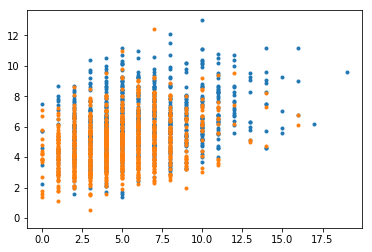

0.0038140975361039553
2.304498861047836  Mean Absolute Error
---------------------------- BayesianRidge ----------------------------


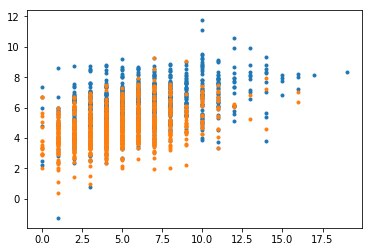

0.168883419695189
2.097585385863419  Mean Absolute Error
---------------------------- MLPRegressor ----------------------------


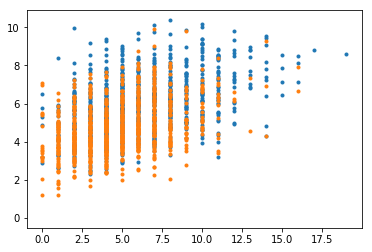

0.15458839812490627
2.1100689385329834  Mean Absolute Error


In [259]:
entrada = ['HomeTeam', 'AwayTeam', 'Season', 'MeanCornersHome', 'MeanCornersAway', 'MeanShotsHome', 'MeanShotsAway', 'HTResult','HTHomeGoals','HTAwayGoals', 'B365H', 'B365D', 'B365A', 'MeanGoalsHome', 'MeanGoalsAway','MeanGoalsConHome', 'MeanGoalsConAway']     
saida = ['HomeTeamCorners', 'AwayTeamCorners']
x, y = select_sets(dataset, entrada, saida)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
x_train, y_train = Fduplicated(x_train, y_train)

print('---------------------------- Random Forest ----------------------------')
RegBay(RandomForestRegressor, x_train, y_train, x_test, y_test)
print('---------------------------- BayesianRidge ----------------------------')
RegBay(BayesianRidge, x_train, y_train, x_test, y_test)
print('---------------------------- MLPRegressor ----------------------------')
RegRS(MLPRegressor, x_train, y_train, x_test, y_test)


# Treinamento com Número de Gols

In [260]:
entrada = ['HomeTeam', 'AwayTeam', 'Season', 'MeanCornersHome', 'MeanCornersAway', 'MeanShotsHome', 'MeanShotsAway', 'B365H', 'B365D', 'B365A', 'MeanGoalsHome', 'MeanGoalsAway','MeanGoalsConHome', 'MeanGoalsConAway', 'HTResult','HTHomeGoals','HTAwayGoals']     
saida = ['FTHomeGoals', 'FTAwayGoals']
x, y = select_sets(dataset, entrada, saida)
print('Atributos Entrada')
display(x.head())
print('Atributos Saída')
display(y.head())
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
x_train, y_train = Fduplicated(x_train, y_train)

Atributos Entrada


,HomeTeam,AwayTeam,Season,MeanCornersHome,MeanCornersAway,MeanShotsHome,MeanShotsAway,B365H,B365D,B365A,MeanGoalsHome,MeanGoalsAway,MeanGoalsConHome,MeanGoalsConAway,HTResult,HTHomeGoals,HTAwayGoals
0,1,34,0,6.210526,4.763158,13.078947,14.605263,1.67,3.60,5.50,1.368421,0.973684,1.026316,2.078947,0,0,1
1,3,18,0,4.763158,6.236842,12.868421,13.842105,3.60,3.25,2.10,1.078947,1.921053,1.447368,1.184211,0,0,1
2,5,28,0,4.815789,4.736842,14.684211,11.684211,2.25,3.25,3.25,1.105263,1.263158,1.763158,1.473684,0,0,1
3,10,15,0,7.526316,3.947368,21.947368,10.210526,1.17,6.50,21.00,2.710526,0.894737,0.842105,1.973684,1,1,1
4,12,0,0,6.052632,6.763158,15.500000,17.368421,3.20,3.25,2.30,1.578947,2.184211,1.289474,1.078947,0,0,3


Atributos Saída


,FTHomeGoals,FTAwayGoals
0,0,2
1,0,2
2,0,1
3,2,1
4,1,6


---------------------------- Random Forest ----------------------------


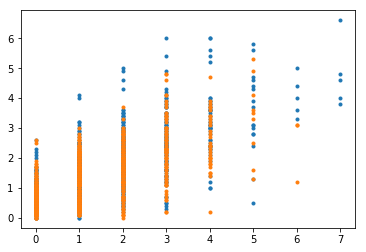

0.43384946937167684
0.7468109339407745  Mean Absolute Error
---------------------------- BayesianRidge ----------------------------


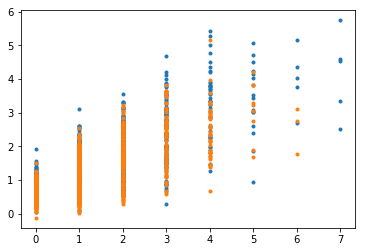

0.539498675571859
0.6789408937181125  Mean Absolute Error
---------------------------- MLPRegressor ----------------------------


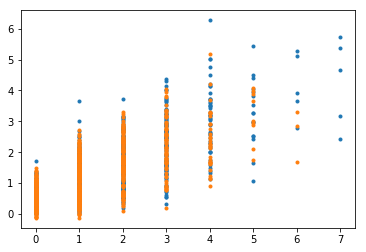

0.5080063791335646
0.6965250938359269  Mean Absolute Error


In [261]:

print('---------------------------- Random Forest ----------------------------')
RegBay(RandomForestRegressor, x_train, y_train, x_test, y_test)
print('---------------------------- BayesianRidge ----------------------------')
RegBay(BayesianRidge, x_train, y_train, x_test, y_test)
print('---------------------------- MLPRegressor ----------------------------')
RegRS(MLPRegressor, x_train, y_train, x_test, y_test)


# Treinamento - Vitória - KNN e DecisionClassifier

Atributos Entrada


,HomeTeam,AwayTeam,Season,MeanCornersHome,MeanCornersAway,MeanShotsHome,MeanShotsAway,B365H,B365D,B365A,MeanGoalsHome,MeanGoalsAway,MeanGoalsConHome,MeanGoalsConAway,HTResult,HTHomeGoals,HTAwayGoals,Referee,MeanCardsHome,MeanCardsAway
0,1,34,0,6.210526,4.763158,13.078947,14.605263,1.67,3.60,5.50,1.368421,0.973684,1.026316,2.078947,0,0,1,15,1.552632,1.710526
1,3,18,0,4.763158,6.236842,12.868421,13.842105,3.60,3.25,2.10,1.078947,1.921053,1.447368,1.184211,0,0,1,16,1.500000,1.289474
2,5,28,0,4.815789,4.736842,14.684211,11.684211,2.25,3.25,3.25,1.105263,1.263158,1.763158,1.473684,0,0,1,0,1.947368,2.026316
3,10,15,0,7.526316,3.947368,21.947368,10.210526,1.17,6.50,21.00,2.710526,0.894737,0.842105,1.973684,1,1,1,2,1.421053,1.684211
4,12,0,0,6.052632,6.763158,15.500000,17.368421,3.20,3.25,2.30,1.578947,2.184211,1.289474,1.078947,0,0,3,17,1.500000,1.473684


Atributos Saída


,FTResult
0,0
1,0
2,0
3,2
4,0


{2: 2430, 0: 1536, 1: 1272}


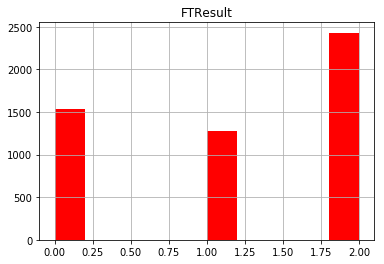

{2: 1536, 1: 1536, 0: 1536}


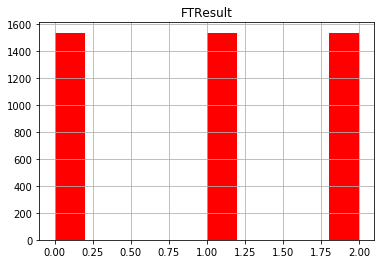

In [262]:
entrada = ['HomeTeam', 'AwayTeam', 'Season', 'MeanCornersHome', 'MeanCornersAway', 'MeanShotsHome', 'MeanShotsAway', 'B365H', 'B365D', 'B365A', 'MeanGoalsHome', 'MeanGoalsAway','MeanGoalsConHome', 'MeanGoalsConAway', 'HTResult','HTHomeGoals','HTAwayGoals',  'Referee',  'MeanCardsHome', 'MeanCardsAway']     
saida = ['FTResult']

x, y = select_sets(dataset, entrada, saida)
print('Atributos Entrada')
display(x.head())
print('Atributos Saída')
display(y.head())
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,  random_state=1)
x_train, y_train = Fduplicated(x_train, y_train)

train = x_train
train['FTResult'] = y_train.values
plot_histogram_balancing(train, 'FTResult')

train = balance_classes_down_sampling(train, 'FTResult', 2.0,0.0)
train = balance_classes_up_sampling(train, 'FTResult', 2.0,1.0)

plot_histogram_balancing(train, 'FTResult')

x_train = np.array(train.drop(labels=['FTResult'],axis=1))
x_test = np.array(x_test)
y_train = np.array(train['FTResult'])
y_test = np.array(y_test)



Accuracy:  0.47293447293447294
F1 Score:  0.4824819929149966


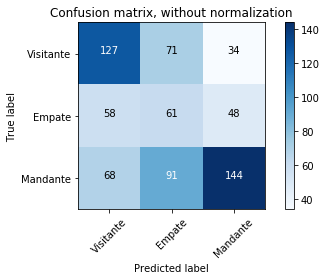

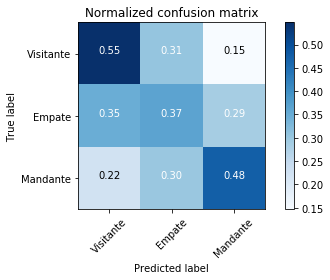

In [263]:
Class(KNeighborsClassifier, x_train, y_train, x_test, y_test, classes_=['Visitante', 'Empate', 'Mandante'])


Accuracy:  0.5527065527065527
F1 Score:  0.5558391645900393


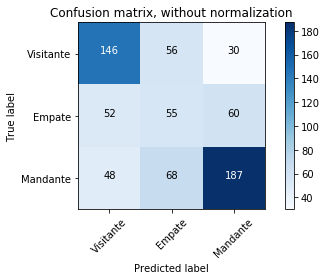

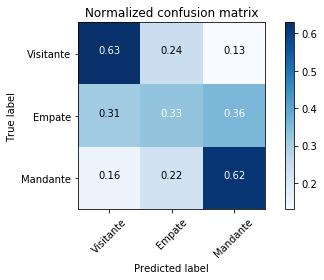

In [264]:
Class(DecisionTreeClassifier, x_train, y_train, x_test, y_test, classes_=['Visitante', 'Empate', 'Mandante'])

# Treinamento - Vitória - Rede Neural

In [117]:
 
entrada = ['HomeTeam', 'AwayTeam', 'Season', 'MeanCornersHome', 'MeanCornersAway', 'MeanShotsHome', 'MeanShotsAway', 'B365H', 'B365D', 'B365A', 'MeanGoalsHome', 'MeanGoalsAway','MeanGoalsConHome', 'MeanGoalsConAway', 'HTResult','HTHomeGoals','HTAwayGoals',  'Referee',  'MeanCardsHome', 'MeanCardsAway']     
saida = ['FTResult']
# fora = ['HomeTeamYellowCards',  'AwayTeamYellowCards','FTHomeGoals', 'FTAwayGoals', 'HomeTeamCorners', 'AwayTeamCorners']
  
 
x, y = select_sets(dataset, entrada, saida)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,  random_state=1)
x_train, y_train = Fduplicated(x_train, y_train)
 
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.125, random_state=1)
 
 
y_train = np_utils.to_categorical(y_train, 3)
y_test = np_utils.to_categorical(y_test, 3)
y_val = np_utils.to_categorical(y_val, 3)
 
model = Sequential()
 
model.add(Dense(40, input_dim=20, init="uniform",activation="relu"))
model.add(Dense(120, activation="tanh", kernel_initializer="uniform"))
model.add(Dense(120, activation="tanh", kernel_initializer="uniform"))
model.add(Dense(20, activation="tanh", kernel_initializer="uniform"))
model.add(Dense(3, activation="softmax", kernel_initializer="uniform"))
 
model.summary()
 
model.compile(
  optimizer = "adam",
  loss = "categorical_crossentropy",
  metrics = ["accuracy"]
)
 
ES = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=10)
 
 
results = model.fit(
  x_train, y_train,
  epochs= 1000,
  validation_data = (x_val, y_val),
  callbacks=[ES]
 )
 
y_pred = model.predict(x_test)
 
accuracy = metrics.accuracy_score(y_test.argmax(1), y_pred.argmax(1))
print(accuracy)
print("-------------------")
 
print("Confusion Matrix: ", confusion_matrix(y_test.argmax(1), y_pred.argmax(1)))
print(y_pred)
print(y_test)

----------VITORIA----------
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 40)                840       
_________________________________________________________________
dense_2 (Dense)              (None, 120)               4920      
_________________________________________________________________
dense_3 (Dense)              (None, 120)               14520     
_________________________________________________________________
dense_4 (Dense)              (None, 20)                2420      
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 63        
Total params: 22,763
Trainable params: 22,763
Non-trainable params: 0
_________________________________________________________________


/home/thiagofsr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(40, input_dim=20, activation="relu", kernel_initializer="uniform")`


Train on 4583 samples, validate on 655 samples
Epoch 1/1000
4583/4583 [==============================] - 1s 221us/step - loss: 0.8877 - acc: 0.5933 - val_loss: 0.7723 - val_acc: 0.6489
Epoch 2/1000
4583/4583 [==============================] - 0s 82us/step - loss: 0.7782 - acc: 0.6513 - val_loss: 0.7423 - val_acc: 0.6519
Epoch 3/1000
4583/4583 [==============================] - 0s 81us/step - loss: 0.7592 - acc: 0.6594 - val_loss: 0.7385 - val_acc: 0.6550
Epoch 4/1000
4583/4583 [==============================] - 0s 77us/step - loss: 0.7451 - acc: 0.6688 - val_loss: 0.7141 - val_acc: 0.6687
Epoch 5/1000
4583/4583 [==============================] - 0s 101us/step - loss: 0.7472 - acc: 0.6611 - val_loss: 0.7513 - val_acc: 0.6534
Epoch 6/1000
4583/4583 [==============================] - 0s 75us/step - loss: 0.7364 - acc: 0.6747 - val_loss: 0.6924 - val_acc: 0.6840
Epoch 7/1000
4583/4583 [==============================] - 0s 75us/step - loss: 0.7235 - acc: 0.6692 - val_loss: 0.6769 - val_acc:

Epoch 60/1000
4583/4583 [==============================] - 0s 87us/step - loss: 0.5295 - acc: 0.7663 - val_loss: 0.5380 - val_acc: 0.7557
0.6381766381766382
-------------------
Confusion Matrix:  [[135  45  52]
 [ 32  53  82]
 [ 16  27 260]]
[[0.77 0.18 0.05]
 [0.83 0.13 0.04]
 [0.03 0.09 0.88]
 ...
 [0.31 0.53 0.16]
 [0.02 0.4  0.57]
 [0.43 0.42 0.15]]
[[1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]]
